In [1]:
%matplotlib notebook
import os
import pyelastix
from skimage.metrics import structural_similarity as compare_ssim
import glob
from image_utils import imgtonumpy, numpytoimg, normalization, shape_as
from PIL import Image, ImageChops
import numpy as np 
import cv2
import json
import pydicom
from os import path
from matplotlib import pyplot as plt


def registration(to_register, reference,t):
	#internal elastix parameters
	params = pyelastix.get_default_params(type=t) #RIGID, AFFINE, BSPLINE
	params.NumberOfResolutions = 8
	params.AutomaticTransformInitialization = True
	params.AutomaticScalesEstimation = False
	params.NumberOfHistogramBins = 64
	params.MaximumStepLength = 4.0
	params.MaximumNumberOfIterations = 500

	registered, field = pyelastix.register(to_register, reference, params, verbose=0)
	return registered

In [2]:
target = Image.open("targets/image3.png") 
reference = Image.open("reference/reference_old.png")
tgt_arr = np.asarray(target).astype(float)
ref_arr = np.asarray(reference).astype(float)
diff = ImageChops.difference(target, reference)
diff_arr =np.asarray(diff).astype(float)

<IPython.core.display.Javascript object>


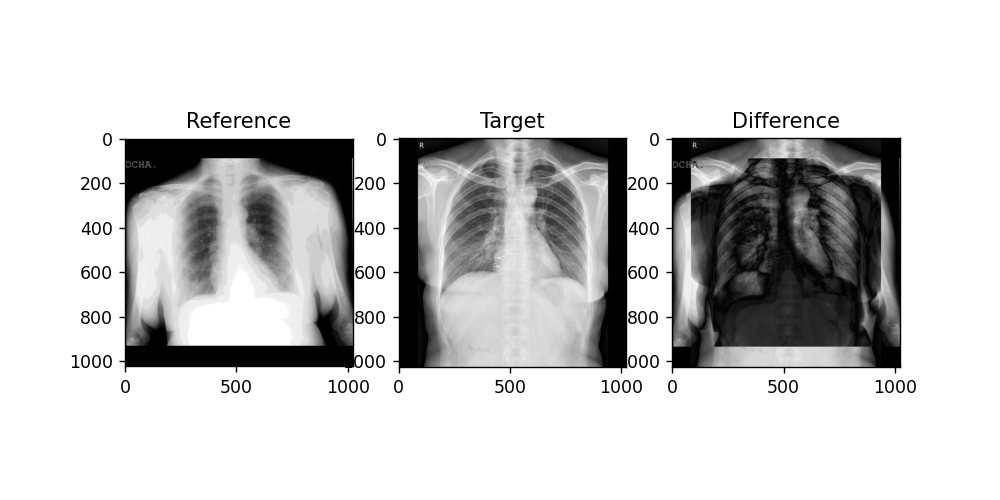

Text(0.5, 1.0, 'Difference')

In [3]:
fig,(x1, x2, x3) = plt.subplots(1,3, figsize = (8, 4))
x1.imshow(ref_arr, cmap = 'gray')
x1.set_title('Reference')
x2.imshow(tgt_arr, cmap = 'gray')
x2.set_title('Target')
x3.imshow(diff_arr, cmap = 'gray')#da fixare
x3.set_title('Difference')



Found elastix version: 5.0.1 in 'elastix.exe'


<IPython.core.display.Javascript object>


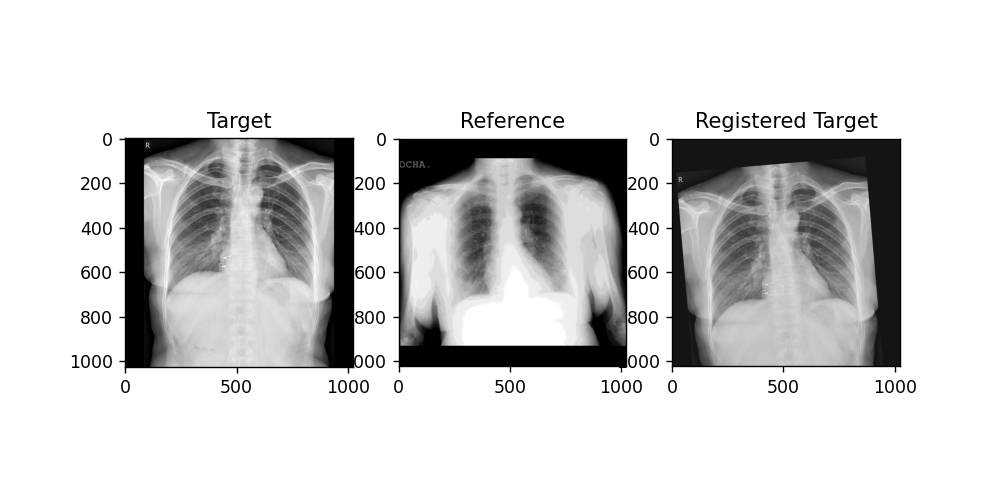

Wall time: 1min 20s


Text(0.5, 1.0, 'Registered Target')

In [4]:
%%time
final_registration = registration(tgt_arr, ref_arr, "RIGID")
fig,(x1, x2, x3) = plt.subplots(1,3, figsize = (8, 4))

x1.imshow(tgt_arr, cmap = 'gray')
x1.set_title('Target')

x2.imshow(ref_arr, cmap = 'gray')
x2.set_title('Reference')

x3.imshow(final_registration, cmap = 'gray')
x3.set_title('Registered Target')

<IPython.core.display.Javascript object>


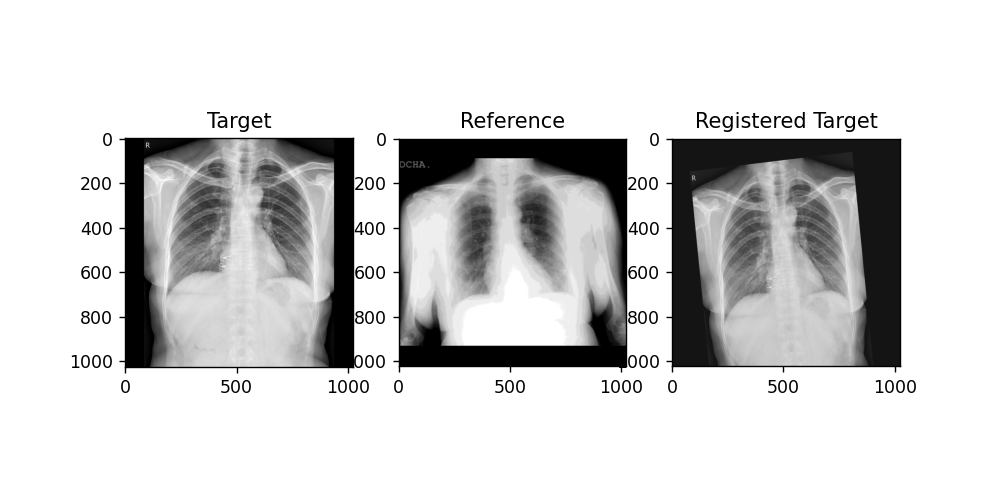

Wall time: 1min 19s


Text(0.5, 1.0, 'Registered Target')

In [5]:
%%time
final_registration = registration(tgt_arr, ref_arr, "AFFINE")
fig,(x1, x2, x3) = plt.subplots(1,3, figsize = (8, 4))

x1.imshow(tgt_arr, cmap = 'gray')
x1.set_title('Target')

x2.imshow(ref_arr, cmap = 'gray')
x2.set_title('Reference')

x3.imshow(final_registration, cmap = 'gray')
x3.set_title('Registered Target')

<IPython.core.display.Javascript object>


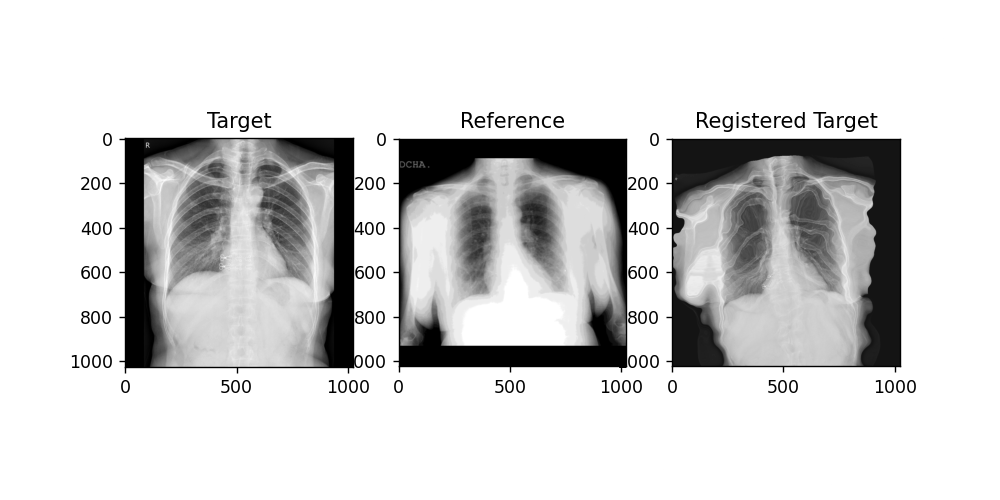

Wall time: 1min 25s


Text(0.5, 1.0, 'Registered Target')

In [6]:
%%time
final_registration = registration(tgt_arr, ref_arr, "BSPLINE")
fig,(x1, x2, x3) = plt.subplots(1,3, figsize = (8, 4))

x1.imshow(tgt_arr, cmap = 'gray')
x1.set_title('Target')

x2.imshow(ref_arr, cmap = 'gray')
x2.set_title('Reference')

x3.imshow(final_registration, cmap = 'gray')
x3.set_title('Registered Target')